In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = "coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
customer_5 = df.iloc[:,4]
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [ ]:
customer_15 = df.iloc[:,14]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [ ]:
customer_total_tenure = df[(df["tenure"] > 70 ) | (df["MonthlyCharges"] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [ ]:
two_mail_yes = df[(df["Contract"] == "Two year") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
customer_333 = df.sample(n=333, random_state=42)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2481,6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
6125,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
3052,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4099,6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,4568-KNYWR,Male,0,No,No,52,Yes,No,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),63.25,3342.45,No
5681,2522-WLNSF,Female,1,Yes,No,34,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),64.20,2106.30,No
830,9101-BWFSS,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,No,Electronic check,108.55,5610.70,Yes
2143,4079-VTGLK,Male,1,Yes,No,30,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,No,Electronic check,74.85,2181.75,No


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [ ]:
x = df['InternetService'].value_counts().keys()
Counts = df['InternetService'].value_counts()

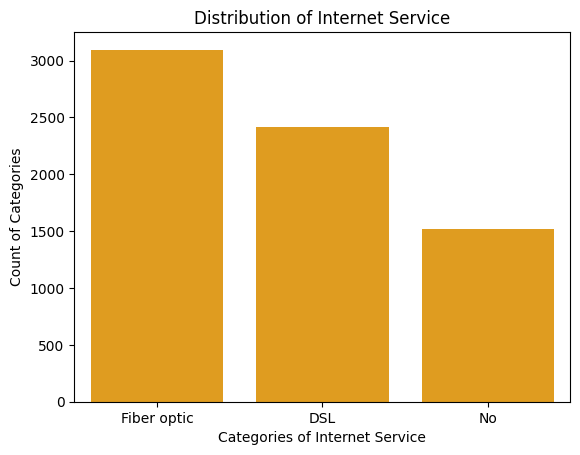

In [ ]:
sns.barplot(x = x, y = Counts, color = "Orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

In [ ]:
tenure = df["tenure"]
tenure

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


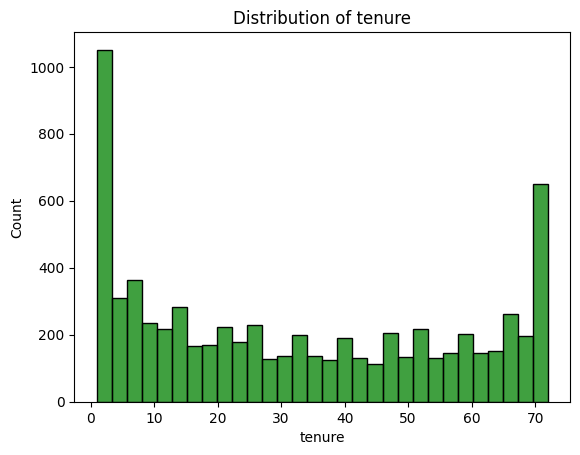

In [ ]:
sns.histplot(x = tenure,color="green",bins=30)
plt.title("Distribution of tenure")
plt.show()

In [ ]:
MonthlyCharges = df["MonthlyCharges"]
MonthlyCharges

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


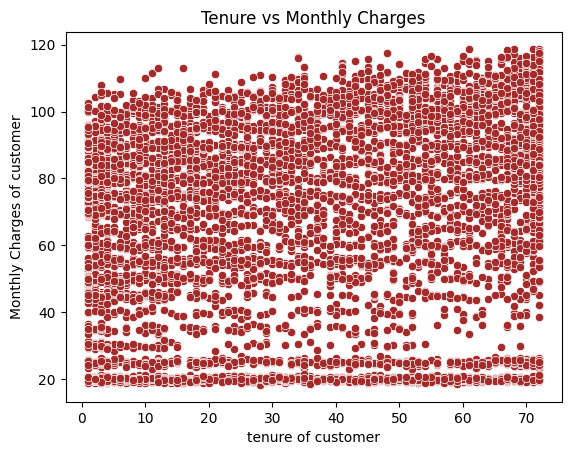

In [ ]:
sns.scatterplot(x = tenure, y = MonthlyCharges, color = "brown")
plt.xlabel("tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

In [ ]:
Contract = df['Contract']
Contract

,Contract
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month
...,...
7038,One year
7039,One year
7040,Month-to-month
7041,Month-to-month


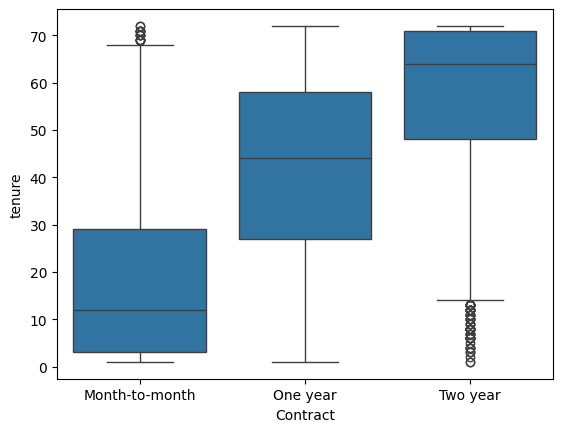

In [ ]:
sns.boxplot(x = Contract, y = tenure)
plt.show()

In [ ]:
x = df['tenure'].values.reshape(-1,1)
y = df['MonthlyCharges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelLR = LinearRegression()

In [ ]:
modelLR.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = modelLR.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,pred)
mse

839.3026954946312

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

np.float64(28.970721349228278)

In [ ]:
error = y_test - pred
error

,MonthlyCharges
2481,-47.994813
6784,-35.943647
6125,43.370805
3052,-10.887004
4099,-27.370667
...,...
2763,7.172960
6747,-34.898135
1700,-48.427758
1099,-0.826592


In [ ]:
x = df['MonthlyCharges'].values.reshape(-1,1)
y = df['Churn']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.65,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelLG = LogisticRegression()

In [ ]:
modelLG.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = modelLG.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
acc = accuracy_score(y_test,pred)
acc

0.7408610885458976

In [ ]:
cn = confusion_matrix(y_test,pred)
cn

array([[1824,    0],
       [ 638,    0]])

In [ ]:
x = df.loc[:,["tenure","MonthlyCharges"]]
y = df['Churn']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = logmodel.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[938,  95],
       [215, 159]])

In [ ]:
acc = accuracy_score(y_test,pred)
acc

0.7796730632551528

In [ ]:
x = df['tenure'].values.reshape(-1,1)
y = df['Churn']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred = dt.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[938,  95],
       [255, 119]])

In [ ]:
acc = accuracy_score(y_test,pred)
acc

0.7512437810945274

In [ ]:
x = df.loc[:,["tenure","MonthlyCharges"]]
y = df['Churn']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rm = RandomForestClassifier()

In [ ]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred = rm.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[1308,  241],
       [ 317,  244]])

In [ ]:
acc = accuracy_score(y_test,pred)
acc

0.7355450236966825